In [2]:
import csv
import colour

In [3]:
sp={}
with open('v_led.csv', newline='') as csvfile:
    for r in csv.reader(csvfile, delimiter=',', quotechar='|'):
        #print([float(_) for _ in r[:-1]])
        sp[int(float(r[0]))]=float(r[1])

In [4]:
with open('green_led.csv', newline='') as csvfile:
    for r in csv.reader(csvfile, delimiter=',', quotechar='|'):
        #print([float(_) for _ in r[:-1]])
        sp[int(float(r[0]))]+=float(r[1])
with open('red_led.csv', newline='') as csvfile:
    for r in csv.reader(csvfile, delimiter=',', quotechar='|'):
        #print([float(_) for _ in r[:-1]])
        sp[int(float(r[0]))]+=float(r[1])

In [5]:
spd = colour.SpectralPowerDistribution(sp, name='Sample')
print(repr(spd))

SpectralDistribution([[  4.00000000e+02,   4.83320000e-01],
                      [  4.01000000e+02,   4.94608000e-01],
                      [  4.02000000e+02,   5.06225000e-01],
                      [  4.03000000e+02,   5.11922000e-01],
                      [  4.04000000e+02,   5.07855000e-01],
                      [  4.05000000e+02,   4.95107000e-01],
                      [  4.06000000e+02,   4.77922000e-01],
                      [  4.07000000e+02,   4.61031000e-01],
                      [  4.08000000e+02,   4.29189000e-01],
                      [  4.09000000e+02,   3.95046000e-01],
                      [  4.10000000e+02,   3.59852000e-01],
                      [  4.11000000e+02,   3.14485000e-01],
                      [  4.12000000e+02,   2.71929000e-01],
                      [  4.13000000e+02,   2.40005000e-01],
                      [  4.14000000e+02,   2.10288000e-01],
                      [  4.15000000e+02,   1.85015000e-01],
                      [  4.16000000e+02,

/home/du/.local/lib/python3.6/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)


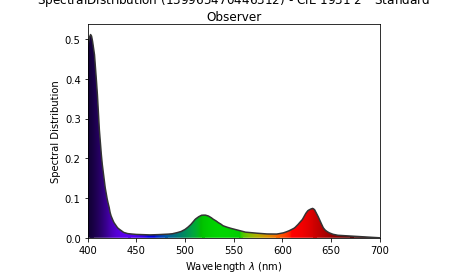

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4c402594a8>)

In [17]:
# Plotting the sample spectral power distribution.
colour.plotting.plot_single_sd(spd)

In [20]:
spd = colour.SpectralPowerDistribution(spd)
    cmfs = colour.colorimetry.MSDS_CMFS_STANDARD_OBSERVER['CIE 1931 2 Degree Standard Observer']
    illuminant = colour.SDS_ILLUMINANTS['D65']

    # Calculating the sample spectral power distribution *CIE XYZ* tristimulus values.
    XYZ = colour.sd_to_XYZ(spd, cmfs, illuminant)
    print(XYZ,colour.XYZ_to_xy(XYZ))

[ 2.2906964   2.58204777  2.7630448 ] [ 0.29999472  0.33815075]


In [22]:
for i in range(500,601,5):
    print(i,",",10**((450-i)/50))

500 , 0.1
505 , 0.07943282347242814
510 , 0.06309573444801933
515 , 0.05011872336272722
520 , 0.039810717055349734
525 , 0.03162277660168379
530 , 0.025118864315095794
535 , 0.0199526231496888
540 , 0.015848931924611134
545 , 0.012589254117941675
550 , 0.01
555 , 0.007943282347242814
560 , 0.00630957344480193
565 , 0.005011872336272725
570 , 0.003981071705534973
575 , 0.0031622776601683794
580 , 0.0025118864315095794
585 , 0.001995262314968879
590 , 0.001584893192461114
595 , 0.0012589254117941675
600 , 0.001


In [25]:
sp={}
with open('VwhiteLED1.csv', newline='') as csvfile:
    for r in csv.reader(csvfile, delimiter=',', quotechar='|'):
        #print([float(_) for _ in r[:-1]])
        sp[int(float(r[0]))]=max(0,float(r[1]))

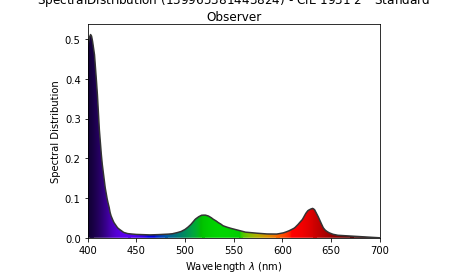

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4c3ad78cf8>)

In [27]:
colour.plotting.plot_single_sd(spd)

In [30]:
def read_400_700_sp(filename):
    sp = {}
    with open(filename, newline='') as csvfile:
        for r in csv.reader(csvfile, delimiter=',', quotechar='|'):
            sp[int(float(r[0]))] = float(r[1])
    return sp
def sp_product(sp1, sp2):
    res = {}
    for key in sp1:
        res[key] = sp1[key] * sp2[key]
    return res


def sp_add(sp1, sp2):
    res = {}
    for key in sp1:
        res[key] = sp1[key] + sp2[key]
    return res

def read_CF():
    spb = read_400_700_sp('blue_filter.csv')
    spg = read_400_700_sp('green_filter.csv')
    spr = read_400_700_sp('red_filter.csv')
    sp = sp_add(sp_add(spb, spg), spr)
    return sp, spb, spg, spr
spLCD, bCF, gCF, rCF = read_CF()

In [31]:
sp_after_blue=sp_product(sp,bCF)
sp_after_green=sp_product(sp,gCF)

/home/du/.local/lib/python3.6/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)


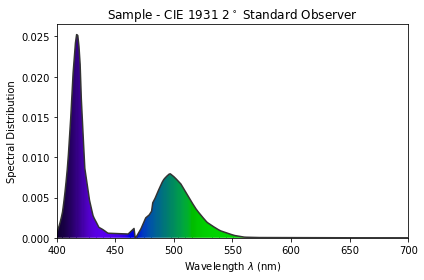

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4c3aaeaeb8>)

In [32]:
colour.plotting.plot_single_sd(colour.SpectralPowerDistribution(sp_after_blue, name='Sample'))

/home/du/.local/lib/python3.6/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "colour.SpectralPowerDistribution" object has been renamed to "colour.SpectralDistribution".
  warn(*args, **kwargs)


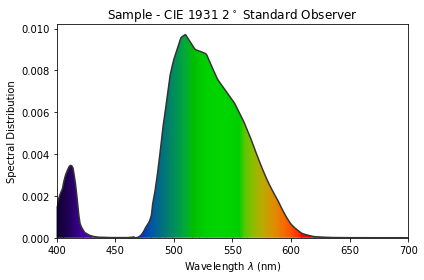

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4c3a9a0780>)

In [33]:
colour.plotting.plot_single_sd(colour.SpectralPowerDistribution(sp_after_green, name='Sample'))

In [34]:
def sp2xy(sp):
    spd = colour.SpectralDistribution(sp, name='Sample')
    cmfs = colour.colorimetry.MSDS_CMFS_STANDARD_OBSERVER['CIE 1931 2 Degree Standard Observer']
    illuminant = colour.SDS_ILLUMINANTS['D65']
    XYZ = colour.sd_to_XYZ(spd, cmfs, illuminant)
    return colour.XYZ_to_xy(XYZ)
print(sp2xy(sp_after_blue))
print(sp2xy(sp_after_green))

[ 0.12086943  0.25892165]
[ 0.23584772  0.6332047 ]
